In [1]:
from astro import constants as c
import numpy as np
from minirats.HaloFinder.py.haloCatalog import haloCatalog as hC

In [2]:
# define a halo catalog object
RamsesDir = '/cral2/sphinx/05_F1000/02_IC20_BP/'
timestep  = 183
hcat = hC(RamsesDir,timestep,HaloDir='Halos/')

restartdir = '/cral/mauerhofer/sphinx/05_F1000/02_IC20_BP/restart/183/'
timestep_restart = 187

In [3]:
# load the halo catalog 
hcat.load_catalog()
hcat.convert_distances() # convert positions and sizes to code units (store in xxxx_cu variables)

In [4]:
# select a halo 
myhalo = np.argmax(hcat.mvir[hcat.level==1])
center = [hcat.x_cu[myhalo],hcat.y_cu[myhalo],hcat.z_cu[myhalo]]
radius = 1.5*hcat.rvir_cu[myhalo]

In [5]:
from minirats.utils.py import cellutils as cu

In [6]:
lmax = -1 # read all levels 
ncells = cu.py_cell_utils.count_cells(RamsesDir,timestep,lmax,center,radius)
idens   = 1
ivx,ivy,ivz=2,3,4
ipre    = 5
imet    = 6
ixhii   = 7
ixheii  = 8
ixheiii = 9
readRT=True

In [7]:
print(ncells)

5153521


In [8]:
cells,cell_pos,cell_l = cu.py_cell_utils.read_cells_hydro(RamsesDir,timestep,lmax,ncells,[idens,10,14,18],center,radius,readRT)


In [9]:
cells_r,cell_pos,cell_l = cu.py_cell_utils.read_cells_hydro_restart(RamsesDir,timestep,restartdir,timestep_restart,lmax,ncells,[22],center,radius,readRT)


In [10]:
cells_r_y,cell_pos,cell_l = cu.py_cell_utils.read_cells_hydro_restart(RamsesDir,timestep,restartdir,184,lmax,ncells,[22],center,radius,readRT)


In [11]:
cells_r_vy,cell_pos,cell_l = cu.py_cell_utils.read_cells_hydro_restart(RamsesDir,timestep,restartdir,185,lmax,ncells,[22],center,radius,readRT)


In [12]:
Bin0 = np.array(cells_r[:,0],dtype='float64')
Bin0_50 = np.array(cells_r_y[:,0],dtype='float64')
Bin0_10 = np.array(cells_r_vy[:,0],dtype='float64')
Bin1 = np.array(cells[:,1],dtype='float64')
rho  = np.array(cells[:,0],dtype='float64')
nH   = rho * hcat.info['unit_nH']

In [13]:
xloc = cell_pos[:,0]
yloc = cell_pos[:,1]
zloc = cell_pos[:,2]

r = 0.9*radius
xmin,xmax = center[0]-r,center[0]+r
ymin,ymax = center[1]-r,center[1]+r
#zmin,zmax = center[2]-r,center[2]+r
zmin,zmax = center[2]-0.00001,center[2]+0.00001

lmax = cell_l.max()
nx,ny = cu.py_cell_utils.get_map_nxny(lmax,xmin,xmax,ymin,ymax)

pc2cm = 3.086e18
cu2pc = hcat.info['unit_l']/pc2cm
R_kpc = hcat.info['unit_l']/pc2cm/1000*r

In [14]:
from matplotlib import pyplot as plt

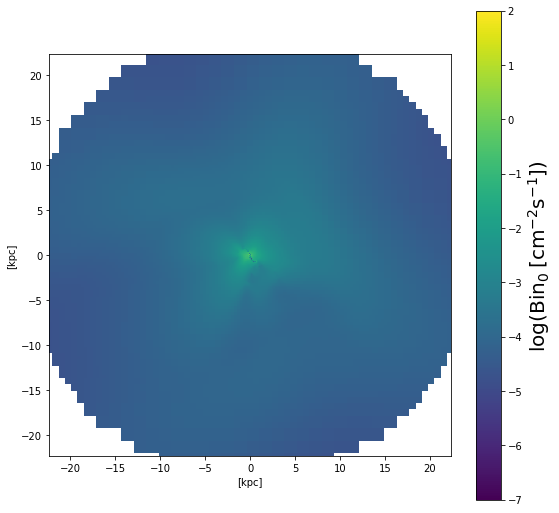

In [15]:
TempMap, w = cu.py_cell_utils.make_map(lmax, False, xmin, xmax, ymin, ymax, zmin, zmax, np.log10(Bin0), nH, xloc, yloc, zloc, cell_l, nx, ny)
#plt.style.use('dark_background')
plt.figure(figsize=(9,9))
plt.imshow(TempMap, origin='lower', extent=[-R_kpc, R_kpc, -R_kpc, R_kpc]) #cmap=plt.get_cmap('seismic')
plt.xlabel('[kpc]')
plt.ylabel('[kpc]')
plt.clim(-7, 2)
cbar = plt.colorbar()
cbar.set_label(r'$\mathrm{log}(\mathrm{Bin_0} \: [\mathrm{cm}^{-2} \mathrm{s}^{-1}])$', fontsize=20)
plt.savefig('Bin0_200ts_map_Halo1.pdf')
plt.show()

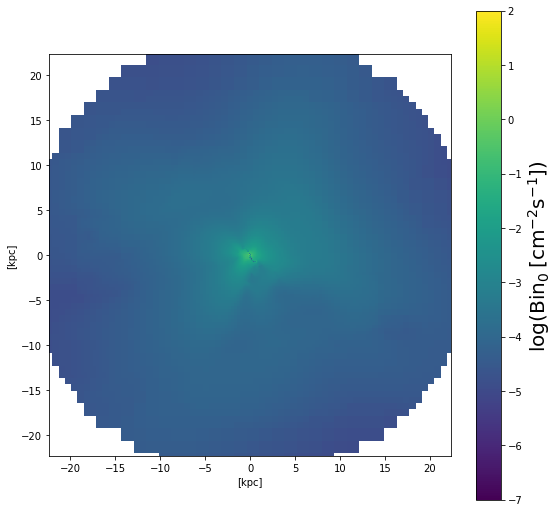

In [16]:
TempMap, w = cu.py_cell_utils.make_map(lmax, False, xmin, xmax, ymin, ymax, zmin, zmax, np.log10(Bin0_50), nH, xloc, yloc, zloc, cell_l, nx, ny)
#plt.style.use('dark_background')
plt.figure(figsize=(9,9))
plt.imshow(TempMap, origin='lower', extent=[-R_kpc, R_kpc, -R_kpc, R_kpc]) #cmap=plt.get_cmap('seismic')
plt.xlabel('[kpc]')
plt.ylabel('[kpc]')
plt.clim(-7, 2)
cbar = plt.colorbar()
cbar.set_label(r'$\mathrm{log}(\mathrm{Bin_0} \: [\mathrm{cm}^{-2} \mathrm{s}^{-1}])$', fontsize=20)
plt.savefig('Bin0_50ts_map_Halo1.pdf')
plt.show()

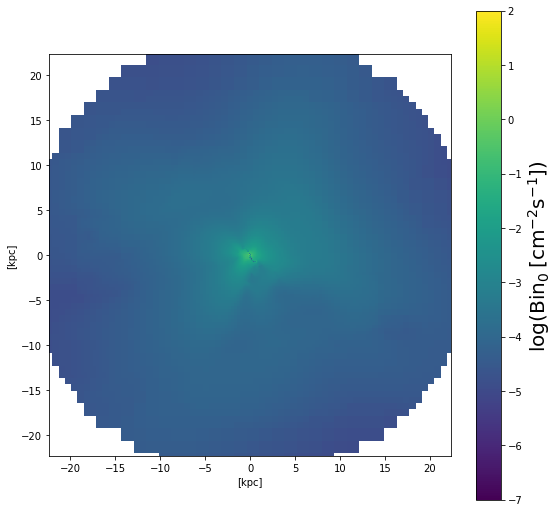

In [17]:
TempMap, w = cu.py_cell_utils.make_map(lmax, False, xmin, xmax, ymin, ymax, zmin, zmax, np.log10(Bin0_10), nH, xloc, yloc, zloc, cell_l, nx, ny)
#plt.style.use('dark_background')
plt.figure(figsize=(9,9))
plt.imshow(TempMap, origin='lower', extent=[-R_kpc, R_kpc, -R_kpc, R_kpc]) #cmap=plt.get_cmap('seismic')
plt.xlabel('[kpc]')
plt.ylabel('[kpc]')
plt.clim(-7, 2)
cbar = plt.colorbar()
cbar.set_label(r'$\mathrm{log}(\mathrm{Bin_0} \: [\mathrm{cm}^{-2} \mathrm{s}^{-1}])$', fontsize=20)
plt.savefig('Bin0_10ts_map_Halo1.pdf')
plt.show()

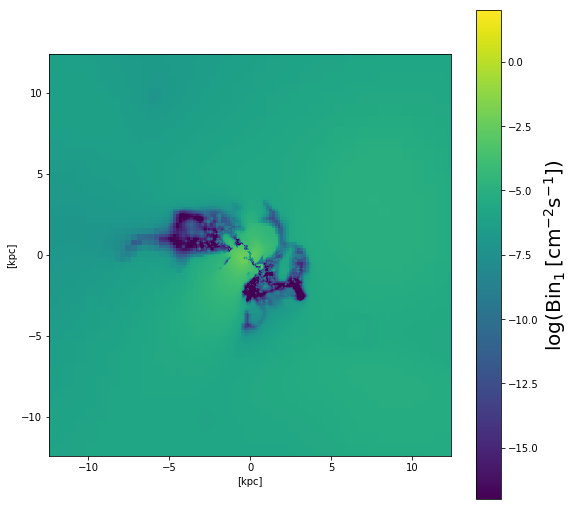

In [29]:
TempMap, w = cu.py_cell_utils.make_map(lmax, False, xmin, xmax, ymin, ymax, zmin, zmax, np.log10(Bin1), nH, xloc, yloc, zloc, cell_l, nx, ny)
#plt.style.use('dark_background')
plt.figure(figsize=(9,9))
plt.imshow(TempMap, origin='lower', extent=[-R_kpc, R_kpc, -R_kpc, R_kpc]) #cmap=plt.get_cmap('seismic')
plt.xlabel('[kpc]')
plt.ylabel('[kpc]')
plt.clim(-17, 2)
cbar = plt.colorbar()
cbar.set_label(r'$\mathrm{log}(\mathrm{Bin_1} \: [\mathrm{cm}^{-2} \mathrm{s}^{-1}])$', fontsize=20)
plt.savefig('Bin1_map_Halo1.pdf')
plt.show()